## SVM -- Renting Listing Inquiries
The second solution with SVM.

In [1]:
# import tools
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV
# measure model by accuracy
from sklearn.metrics import accuracy_score

from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

### Read & Discovery data

In [2]:
# as feature engineering completed in LR solution, use the file directly 
train = pd.read_csv('../RentListingInquries_FE_train.csv')[:5000]
test = pd.read_csv('../RentListingInquries_FE_test.csv')[:5000]

train.head()

,bathrooms,bedrooms,latitude,longitude,price,price_bathrooms,price_bedrooms,room_diff,room_num,Year,...,walk,walls,war,washer,water,wheelchair,wifi,windows,work,interest_level
0,1.5,3,40.7145,-73.9425,3000,1200.0,750.000000,-1.5,4.5,2016,...,0,0,0,0,0,0,0,0,0,1
1,1.0,2,40.7947,-73.9667,5465,2732.5,1821.666667,-1.0,3.0,2016,...,0,0,0,0,0,0,0,0,0,2
2,1.0,1,40.7388,-74.0018,2850,1425.0,1425.000000,0.0,2.0,2016,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,40.7539,-73.9677,3275,1637.5,1637.500000,0.0,2.0,2016,...,0,0,0,0,0,0,0,0,0,2
4,1.0,4,40.8241,-73.9493,3350,1675.0,670.000000,-3.0,5.0,2016,...,0,0,1,0,0,0,0,0,0,2


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49352 entries, 0 to 49351
Columns: 225 entries, bathrooms to interest_level
dtypes: float64(7), int64(218)
memory usage: 84.7 MB


In [4]:
train.shape

(49352, 225)

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74659 entries, 0 to 74658
Columns: 225 entries, listing_id to work
dtypes: float64(7), int64(218)
memory usage: 128.2 MB


In [6]:
test.shape

(74659, 225)

### Data Preprocessing

In [5]:
#数据标准化
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

y_train = train['interest_level']
X_train = train.drop(['interest_level'], axis = 1)

X_train_part, X_test, y_train_part, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.fit_transform(X_test)

### Training the model
#### Default SVC

In [6]:
from sklearn.svm import LinearSVC

SVC1 = LinearSVC().fit(X_train_part, y_train_part)

In [7]:
from sklearn import metrics
y_predict = SVC1.predict(X_val)

print("Classification report for classifier %s:\n%s\n"
      % (SVC1, metrics.classification_report(y_val, y_predict)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_val, y_predict))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        79
          1       0.25      1.00      0.40       248
          2       1.00      0.00      0.01       673

avg / total       0.73      0.25      0.10      1000


Confusion matrix:
[[  0  79   0]
 [  0 248   0]
 [  0 670   3]]


/Users/hankaei/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Tuning regularization parameter

In [8]:
def fit_grid_point_Linear(C, X_train, y_train, X_val, y_val):
    svc2 = LinearSVC(C = C)
    svc2 = svc2.fit(X_train, y_train)
    accuracy = svc2.score(X_val, y_val)
    
    print('accuracy: {}'.format(accuracy))
    return accuracy

accuracy: 0.673
accuracy: 0.088


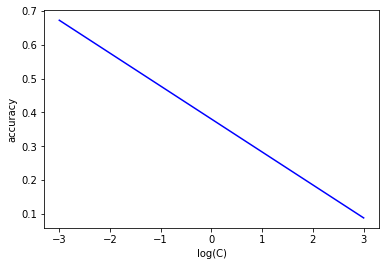

In [9]:
C_s = np.logspace(-3, 3, 2)

accuracy_s = []
for i, oneC in enumerate(C_s):
    tmp = fit_grid_point_Linear(oneC, X_train, y_train, X_val, y_val)
    accuracy_s.append(tmp)
    
x_axis = np.log10(C_s)
pyplot.plot(x_axis, np.array(accuracy_s), 'b-')

pyplot.legend()
pyplot.xlabel('log(C)')
pyplot.ylabel('accuracy')
pyplot.savefig('SVM_RentingListingInquries.png')

pyplot.show()

In [10]:
from sklearn.svm import SVC

def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    svc3 = SVC(C = C, kernel = 'rbf', gamma = gamma)
    svc3 = svc3.fit(X_train, y_train)
    
    accuracy = svc3.score(X_val, y_val)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

In [11]:
# set tuning parameters
C_s = np.logspace(2, 3)
gamma_s = np.logspace(2, 3)

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train_part, y_train_part, X_val, y_val)
        accuracy_s.append(tmp)

accuracy: 0.673
accuracy: 0.673
accuracy: 0.61
accuracy: 0.672


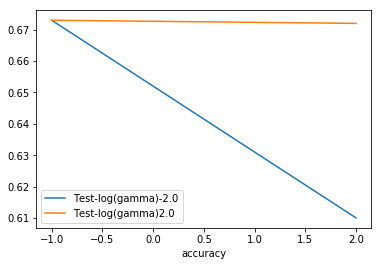

In [12]:
accuracy_s1 = np.array(accuracy_s).reshape(len(C_s), len(gamma_s))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    pyplot.plot(x_axis, np.array(accuracy_s1[:,j]), label='Test-log(gamma)'+str(np.log10(gamma)))

pyplot.legend()
pyplot.xlabel('log(C)')
pyplot.xlabel('accuracy')
pyplot.savefig('RBF_SVM_RentingListingInquries.png')

pyplot.show()

In [24]:
svc3 = SVC(C = 1, kernel = 'rbf', gamma = 2)
svc3.fit(X_train, y_train)
pred = svc3.predict(test.drop(['listing_id'], axis = 1))
#pred.to_csv('pred_svc.csv') 